In [1]:
### IMPORTS ###
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import time
import matplotlib.pyplot as plt

In [3]:
rand = torch.randn(2,3,3)
rand

tensor([[[ 0.0161,  0.5193, -0.2051],
         [ 1.5649,  1.3475, -0.1770],
         [ 0.8917,  0.4141, -0.4333]],

        [[-0.5856,  0.5715,  0.9434],
         [ 0.5948, -0.0265,  0.9099],
         [ 0.6955,  0.0337,  2.2681]]])

In [4]:
x = torch.ones(2,2, requires_grad=True)
y = x + 2
z = y**2 * 3
z = z.mean()

z.backward()
print("Averagae Gradient")
print(x.grad.sum())

Averagae Gradient
tensor(18.)


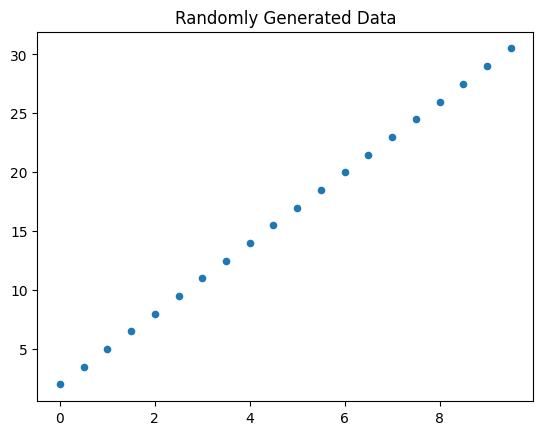

In [5]:
X = np.arange(0, 10, 0.5)
epsilon = np.random.normal(0, 0.5, len(X))
y = (2 + 3*X)

plt.scatter(X, y, s=20)
plt.title("Randomly Generated Data")
plt.show()

In [6]:
X, y = X.reshape(-1,1), y.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)
print("W_1:", model.coef_[0][0])
print("W_0:", model.intercept_[0])

W_1: 3.0000000000000004
W_0: 1.9999999999999982


In [30]:
torch.seed()

class SGDRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.dense= nn.Linear(1,1)
        
    def forward(self, x):
        y= self.dense(x)
        return y 

model= SGDRegression()
loss_funct= torch.nn.MSELoss() 
optimizer= optim.SGD(model.parameters(), lr= 0.005)

X_train= torch.tensor(X, dtype=torch.float32)
y_train= torch.tensor(y, dtype= torch.float32)

print(X_train.shape)
print(y_train.shape)
print("Parameters before Training the model ....")
for name, param in model.named_parameters():
    print(name, param)

torch.Size([20, 1])
torch.Size([20, 1])
Parameters before Training the model ....
dense.weight Parameter containing:
tensor([[0.4187]], requires_grad=True)
dense.bias Parameter containing:
tensor([-0.2891], requires_grad=True)


In [31]:
# training loop 
epochs= 10

for epoch in range(epochs):

    y_pred= model(X_train)

    #losses
    optimizer.zero_grad()
    loss = loss_funct(y_pred, y_train) #calculate the loss
    loss.backward()
    optimizer.step()

print(f"Training Loss : {loss.item()}")

Training Loss : 1.1583995819091797


In [33]:
print("Model parameters after training....")
for name, param in model.named_parameters():
    print(name, param)

Model parameters after training....
dense.weight Parameter containing:
tensor([[3.2146]], requires_grad=True)
dense.bias Parameter containing:
tensor([0.1938], requires_grad=True)


In [40]:
model_pred = X_train[1].item()* 3.2146 + 0.1938 #y = mx + b
model_pred

1.8011

In [41]:
model.eval() 
with torch.no_grad():
    Y_pred2 = model(X_train[1])

print(f"Model predictions is a : {Y_pred2}")

Model predictions is a : tensor([1.8011])


In [42]:
# save model 
torch.save(model, "linear_regression.pt")

In [45]:
#load model 
loaded_model= torch.load("linear_regression.pt")

loaded_model.eval() 
with torch.no_grad():
    Y_pred2 = loaded_model(X_train[1])

print(f"Model predictions is a : {Y_pred2}")


Model predictions is a : tensor([1.8011])


In [44]:
loaded_model

SGDRegression(
  (dense): Linear(in_features=1, out_features=1, bias=True)
)

# What about Classification?

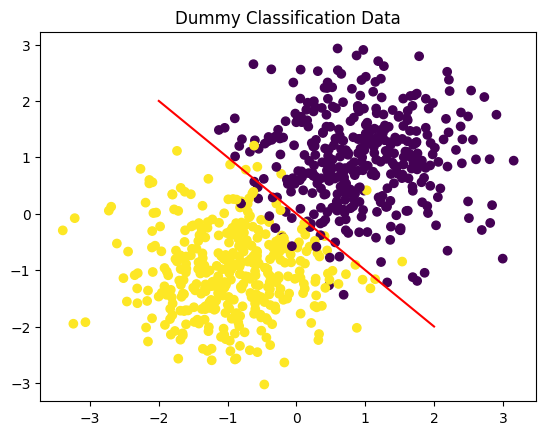

In [46]:
### Generate Blob Data ###
centers = [[1, 1], [-1, -1]]
X, y = make_blobs(n_samples=750, centers=centers, cluster_std=0.8,
                            random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Dummy Classification Data")
plt.plot([-2,2], [2,-2], "r")
plt.show()


### Add Dimension to y
y = y.reshape(-1,1)

In [49]:
print(X.shape)
print(y.shape)

(750, 2)
(750, 1)


In [104]:
# create the logistic Regression model 
class Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.dense= nn.Linear(in_features=2, 
                             out_features=1)
    def forward(self,x):
        x= self.dense(x)
        logits= torch.sigmoid(x)
        return logits

# Data prep 
X_train= torch.tensor(X, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32)

# load the model 
model = Logistic()
loss_funct= nn.BCELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr= 0.005)
Epochs= 100
    

In [105]:
losses= []

for epoch in range(Epochs):
    optimizer.zero_grad() 
    y_pred= model(X_train)

    # losses 
    loss = loss_funct(y_pred, y_train)
    loss.backward()
    optimizer.step() 
    
    losses.append(loss.item())

In [106]:
accuracy = torch.sum((y_pred > 0.5).int() == y_train) / len(y_train)
accuracy

tensor(0.8173)

In [109]:
torch.save(model, "Logistic_regression.pt")

In [112]:
import seaborn as sns 

In [119]:
len(losses)

100

[]

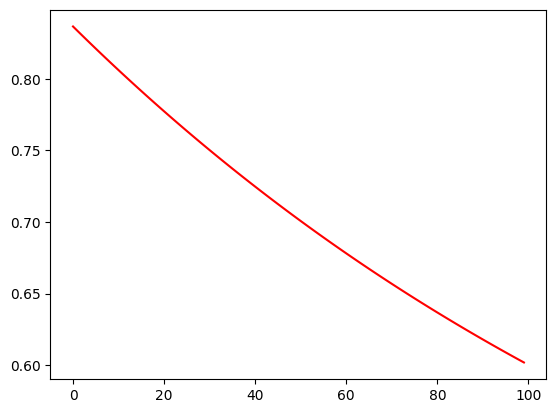

In [126]:
sns.lineplot(x=range(len(losses)), y= losses, color= 'red')
plt.plot()